# <center>Encontro Módulo 1 - Case Churn</center>
___

## Conteúdo
* 0 - [Introdução](#intro) <br>
* 4 - [Aquisição dos Dados](#data) <br>
* 5 - [Pré-processamento de dados](#clean) <br>
* 6 - [Análise Exploratória](#eda) <br>
* 7 - [Feature Engineering](#fe) <br>
* 8 - [Construção do Modelo](#model) <br>

<a id="casemod1"></a>

<a id='intro'></a>
## 0. Introdução

Esse notebook será utilizado como apoio ao case apresentado no encontro do final do módulo 1.

O intuito desse notebook é mostrar como fazemos para aplicar o *pipeline* de ciência de dados em um projeto real. Para simplicidade, alguns passos do *pipeline* serão passados de forma bem breve e não exaustiva, apenas para fim de exemplificação. Além disso, utilizaremos de técnicas e conceitos que serão apresentados mais pra frente no nosso curso, então não é esperado que você conheça e entenda 100% do código desse notebook.

Como exercício, a medida que você for avançando no curso, volte para esse notebook e tente verificar o que mais poderia ter sido feito em cada etapa, além de tentar entender aqueles passos que não estão claros para você nesse primeiro momento.

<a id='data'></a>
## 4. Aquisição dos Dados

Os dados utilizados nesse notebook estão no arquivo ```bd_churn.txt```. O código abaixo apenas lê o arquivo em um ```DataFrame```, uma estrutura de dados da biblioteca ```pandas```, que é bastante utilizada em ciência de dados. Essa estrutura trata os dados como tabelas, com linhas e colunas, bem parecido com o excel. No próximo módulo teremos uma aula específica para entender melhor sobre esse pacote.

In [1]:
import pandas as pd

df_churn = pd.read_csv('bd_churn.txt', sep='\t', decimal='.')
df_churn.head()

C:\Users\yrbel\AppData\Local\Temp\ipykernel_8972\4175232269.py:3: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df_churn = pd.read_csv('bd_churn.txt', sep='\t', decimal='.')


,CUST_ID,START_DT,END_DT,LATE_ST,CREDIT_CLASS,INC_RANGE,GENDER,AGE,INCOME,CUST_TYPE,...,CR_DT3,PAY_VAL1,PAY_VAL2,PAY_VAL3,DUE_VAL1,DUE_VAL2,DUE_VAL3,CHURN_FL,TEN_RAW,TENURE
0,1,2013-05-23,2013-05-23,N,0,60,F,47,6000.0,S,...,2015-01-22,1921.64,1921.64,1921.64,1891.64,1891.64,1891.64,0,54259200,0.951916
1,2,2014-04-14,2014-04-14,N,0,0,F,0,0.0,S,...,2015-01-10,455.17,455.17,455.17,455.17,455.17,455.17,0,26092800,0.457768
2,3,2013-07-01,2013-07-01,N,0,0,M,53,0.0,S,...,2015-01-04,1281.07,1281.07,1281.07,1281.07,1281.07,1281.07,0,50889600,0.892800
3,4,2013-06-16,2014-11-26,N,0,20,M,65,2000.0,S,...,2015-01-11,1653.90,1653.90,1653.90,1653.90,1653.90,1653.90,0,52185600,0.915537
4,5,2014-04-29,2014-05-18,N,0,0,M,37,0.0,S,...,2015-01-10,649.18,649.18,649.18,649.18,649.18,649.18,0,24796800,0.435032


In [2]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 75 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CUST_ID       10000 non-null  int64  
 1   START_DT      10000 non-null  object 
 2   END_DT        10000 non-null  object 
 3   LATE_ST       10000 non-null  object 
 4   CREDIT_CLASS  10000 non-null  object 
 5   INC_RANGE     10000 non-null  int64  
 6   GENDER        10000 non-null  object 
 7   AGE           10000 non-null  int64  
 8   INCOME        10000 non-null  float64
 9   CUST_TYPE     10000 non-null  object 
 10  INPUT_DT      10000 non-null  object 
 11  ACCT_TYPE     10000 non-null  object 
 12  AMT_CHARGED1  10000 non-null  int64  
 13  AMT_CHARGED2  10000 non-null  int64  
 14  AMT_CHARGED3  10000 non-null  int64  
 15  CALL_TP1      10000 non-null  int64  
 16  CALL_TP2      10000 non-null  int64  
 17  CALL_TP3      10000 non-null  object 
 18  NUM_SP1       10000 non-nul

<a id='clean'></a>
## 5. Pré-processamento de Dados

Como um primeiro passo após o entendimento básico dos dados temos o tratamento deles. Primeiro vamos remover algumas colunas dos dados e depois faremos um tratamento de exemplo. Existem alguns tratamentos diferentes que podemos fazer, mas aqui vamos focar no tratamento de valores nulos. Esse tratamento pode ser feito substituindo os nulos por outros valores ou retirando as linhas que contém nulos. Nesse caso, seguiremos pelo segundo caminho, utilizando o método ```.dropna()```.


In [3]:
df_churn = df_churn.drop(["CUST_ID", "START_DT", "END_DT", "INPUT_DT", "ACCT_TYPE", 
                          "CLOSED1", "CLOSED2", "CLOSED3", "DUE_DT1", "DUE_DT2", "DUE_DT3", 
                          "CHARGE1", "CHARGE2", "CHARGE3", "CH_BEG1", "CH_BEG2", "CH_BEG3", 
                          "CH_END1", "CH_END2", "CH_END3", "BILL_ST1", "BILL_ST2", "BILL_ST3", 
                          "LT_PMT1", "LT_PMT2", "LT_PM3", "ADJ1", "ADJ2", "ADJ3", "CR_DT1",
                          "CR_DT2", "CR_DT3", "TEN_RAW"], axis=1)
df_churn = df_churn.dropna()
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LATE_ST       10000 non-null  object 
 1   CREDIT_CLASS  10000 non-null  object 
 2   INC_RANGE     10000 non-null  int64  
 3   GENDER        10000 non-null  object 
 4   AGE           10000 non-null  int64  
 5   INCOME        10000 non-null  float64
 6   CUST_TYPE     10000 non-null  object 
 7   AMT_CHARGED1  10000 non-null  int64  
 8   AMT_CHARGED2  10000 non-null  int64  
 9   AMT_CHARGED3  10000 non-null  int64  
 10  CALL_TP1      10000 non-null  int64  
 11  CALL_TP2      10000 non-null  int64  
 12  CALL_TP3      10000 non-null  object 
 13  NUM_SP1       10000 non-null  int64  
 14  NUM_SP2       10000 non-null  int64  
 15  NUM_SP3       10000 non-null  int64  
 16  DUR1          10000 non-null  float64
 17  DUR2          10000 non-null  float64
 18  DUR3          10000 non-nul

In [4]:
df_churn.head()

,LATE_ST,CREDIT_CLASS,INC_RANGE,GENDER,AGE,INCOME,CUST_TYPE,AMT_CHARGED1,AMT_CHARGED2,AMT_CHARGED3,...,P_METH2,P_METH3,PAY_VAL1,PAY_VAL2,PAY_VAL3,DUE_VAL1,DUE_VAL2,DUE_VAL3,CHURN_FL,TENURE
0,N,0,60,F,47,6000.0,S,9,11,7,...,DD,DD,1921.64,1921.64,1921.64,1891.64,1891.64,1891.64,0,0.951916
1,N,0,0,F,0,0.0,S,5,6,6,...,PB,PB,455.17,455.17,455.17,455.17,455.17,455.17,0,0.457768
2,N,0,0,M,53,0.0,S,5,10,7,...,PB,PB,1281.07,1281.07,1281.07,1281.07,1281.07,1281.07,0,0.892800
3,N,0,20,M,65,2000.0,S,11,11,11,...,PB,PB,1653.90,1653.90,1653.90,1653.90,1653.90,1653.90,0,0.915537
4,N,0,0,M,37,0.0,S,8,9,10,...,PB,PB,649.18,649.18,649.18,649.18,649.18,649.18,0,0.435032


<a id='eda'></a>
## 6. Análise Exploratória

### Análise univariada
Uma das primeiras ações que tomamos ao ler dados em um ```DataFrame``` (df) é pegar algumas características dele como tamanho, tipos de dado, quantidade de nulos e etc. Na célula anterior já utilizamos o método ```.head()``` para ver as primeiras linhas do nosso df. Vamos então utilizar também o método ```.info()``` para ver tamanho e tipos de dados e o ```.describe()``` para obter informações sobre as colunas numéricas.

In [5]:
df_churn.describe()

,INC_RANGE,AGE,INCOME,AMT_CHARGED1,AMT_CHARGED2,AMT_CHARGED3,CALL_TP1,CALL_TP2,NUM_SP1,NUM_SP2,...,ONETIME2,ONETIME3,PAY_VAL1,PAY_VAL2,PAY_VAL3,DUE_VAL1,DUE_VAL2,DUE_VAL3,CHURN_FL,TENURE
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.952500,36.746900,1573.020478,9.728900,10.307800,10.538300,1.596000,1.591700,11.186500,12.437600,...,15.259474,18.084909,1538.119829,1528.182792,1518.284314,1424.361883,1417.048755,1408.105488,0.094000,0.611500
std,20.610136,13.185008,2478.744964,4.644735,5.632533,7.104321,0.836692,0.846205,15.325149,16.811965,...,50.014076,68.313519,1062.034516,1072.857133,1089.535111,983.576267,992.816492,1008.027904,0.291843,0.264530
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034863
25%,0.000000,27.000000,0.000000,7.000000,7.000000,7.000000,2.000000,2.000000,1.000000,1.000000,...,0.000000,0.000000,810.357500,803.927500,797.902500,715.577500,717.057500,709.060000,0.000000,0.385011
50%,10.000000,35.000000,900.000000,9.000000,9.000000,9.000000,2.000000,2.000000,6.000000,7.000000,...,0.000000,0.000000,1388.135000,1386.940000,1386.295000,1308.300000,1307.235000,1307.020000,0.000000,0.692716
75%,20.000000,45.000000,2000.000000,11.000000,12.000000,13.000000,2.000000,2.000000,15.000000,17.000000,...,12.267500,12.000000,2057.677500,2058.780000,2058.780000,1893.577500,1893.342500,1895.310000,0.000000,0.835200
max,160.000000,99.000000,57750.000000,52.000000,51.000000,79.000000,5.000000,5.000000,273.000000,203.000000,...,873.110000,1760.000000,16694.350000,16694.350000,16694.350000,16189.350000,16189.350000,16189.350000,1.000000,0.994358


### Análises de variáveis

Outra tarefa comum na análise de exploratória é entender a nossa variável de interesse (no caso, a coluna **CHURN_FL**) e como ela se relaciona com as demais.

Vamos começar entendendo a taxa de *churn* na nossa base. Dado que a variável de interesse é uma flag se aquele cliente deu *churn* ou não, a taxa nada mais é do que a média dessa variável. Substitua a lacuna pelo nome da coluna para calcular sua média no código abaixo.

In [6]:
print('A taxa de churn é:', df_churn["CHURN_FL"].mean())

A taxa de churn é: 0.094


Agora vamos ver como essa taxa se comporta de acordo com outras variáveis dos nossos dados. Apenas para exemplo, vamos analisar o *churn* contra duas variáveis (uma numérica e outra categórica), mas em um projeto analisaríamos todas. Você pode tentar trocar as variáveis do exemplo por outras e ver se funciona, mas eventualmente será necessário algumas alterações para melhorar a visualização.

<AxesSubplot:xlabel='CHURN_FL', ylabel='AGE'>

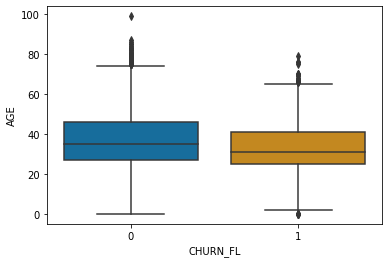

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df_churn,
            x='CHURN_FL',
            y='AGE',
            palette="colorblind")

<AxesSubplot:xlabel='AGE', ylabel='Density'>

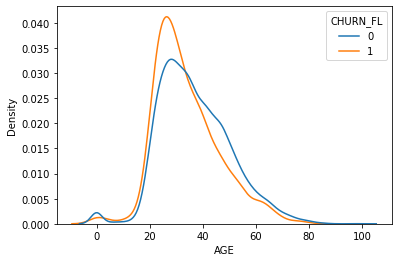

In [8]:
sns.kdeplot(data=df_churn,
            x="AGE",
            hue="CHURN_FL",
            common_norm=False)

<AxesSubplot:xlabel='CREDIT_CLASS', ylabel='CHURN_FL'>

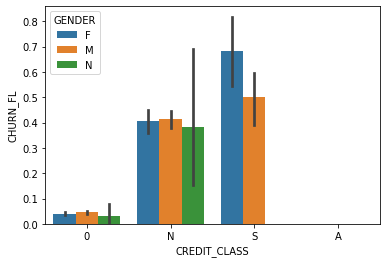

In [9]:
sns.barplot(data=df_churn,
            x="CREDIT_CLASS",
            y="CHURN_FL",
            hue="GENDER")

<a id='fe'></a>
## 7. Feature Engineering



In [10]:
# seleciona colunas categoricas
object_cols = df_churn.select_dtypes(include='object').columns.values
object_cols

array(['LATE_ST', 'CREDIT_CLASS', 'GENDER', 'CUST_TYPE', 'CALL_TP3',
       'BAN_ST1', 'BAN_ST2', 'BAN_ST3', 'P_METH1', 'P_METH2', 'P_METH3'],
      dtype=object)

In [11]:
# mostra valores distintos dessas colunas
for col in object_cols:
  print(col, df_churn[col].unique())

LATE_ST ['N' 'D']
CREDIT_CLASS ['0' 'N' 'S' 'A']
GENDER ['F' 'M' 'N']
CUST_TYPE ['S' 'R' 'P']
CALL_TP3 ['2' '0' '5' ' ' '1']
BAN_ST1 ['O' 'S']
BAN_ST2 ['O' '0' 'S' 'N' 'T']
BAN_ST3 ['O' 'S' '0' 'N']
P_METH1 ['DD' 'PB' '0 ' 'CA' 'FM' 'CK']
P_METH2 ['DD' 'PB' '0 ' 'CA' 'FM' 'CK']
P_METH3 ['DD' 'PB' '0 ' 'CA' 'FM' 'CK']


In [12]:
# cria variaveis dummies
df_churn = pd.concat([df_churn.drop(object_cols, axis=1),
                      pd.get_dummies(df_churn[object_cols], prefix=object_cols)], axis=1)
print(df_churn.shape)
df_churn.head()

(10000, 77)


,INC_RANGE,AGE,INCOME,AMT_CHARGED1,AMT_CHARGED2,AMT_CHARGED3,CALL_TP1,CALL_TP2,NUM_SP1,NUM_SP2,...,P_METH2_CK,P_METH2_DD,P_METH2_FM,P_METH2_PB,P_METH3_0,P_METH3_CA,P_METH3_CK,P_METH3_DD,P_METH3_FM,P_METH3_PB
0,60,47,6000.0,9,11,7,2,2,7,12,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0.0,5,6,6,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,53,0.0,5,10,7,0,2,0,1,...,0,0,0,1,0,0,0,0,0,1
3,20,65,2000.0,11,11,11,2,2,15,22,...,0,0,0,1,0,0,0,0,0,1
4,0,37,0.0,8,9,10,2,2,6,10,...,0,0,0,1,0,0,0,0,0,1


In [13]:
df_churn.columns

Index(['INC_RANGE', 'AGE', 'INCOME', 'AMT_CHARGED1', 'AMT_CHARGED2',
       'AMT_CHARGED3', 'CALL_TP1', 'CALL_TP2', 'NUM_SP1', 'NUM_SP2', 'NUM_SP3',
       'DUR1', 'DUR2', 'DUR3', 'CALLS1', 'CALLS2', 'CALLS3', 'RECURR1',
       'RECURR2', 'RECURR3', 'ONETIME1', 'ONETIME2', 'ONETIME3', 'PAY_VAL1',
       'PAY_VAL2', 'PAY_VAL3', 'DUE_VAL1', 'DUE_VAL2', 'DUE_VAL3', 'CHURN_FL',
       'TENURE', 'LATE_ST_D', 'LATE_ST_N', 'CREDIT_CLASS_0', 'CREDIT_CLASS_A',
       'CREDIT_CLASS_N', 'CREDIT_CLASS_S', 'GENDER_F', 'GENDER_M', 'GENDER_N',
       'CUST_TYPE_P', 'CUST_TYPE_R', 'CUST_TYPE_S', 'CALL_TP3_ ', 'CALL_TP3_0',
       'CALL_TP3_1', 'CALL_TP3_2', 'CALL_TP3_5', 'BAN_ST1_O', 'BAN_ST1_S',
       'BAN_ST2_0', 'BAN_ST2_N', 'BAN_ST2_O', 'BAN_ST2_S', 'BAN_ST2_T',
       'BAN_ST3_0', 'BAN_ST3_N', 'BAN_ST3_O', 'BAN_ST3_S', 'P_METH1_0 ',
       'P_METH1_CA', 'P_METH1_CK', 'P_METH1_DD', 'P_METH1_FM', 'P_METH1_PB',
       'P_METH2_0 ', 'P_METH2_CA', 'P_METH2_CK', 'P_METH2_DD', 'P_METH2_FM',
       'P_M

<a id='model'></a>
## 8. Construção do Modelo

### Separação de treino e teste

Para começar, vamos separar nossos dados em treino e teste. Essa é uma etapa que deve ser feita em todos os modelos supervisionados que você for fazer daqui pra frente, para garantir a qualidade do modelo. Basicamente, aplicamos as técnicas de *machine learning* na base de treino e verificamos os resultados na base de teste para garantir que não há *overfitting*. O código abaixo separa os dados com a função ```train_test_split``` do ```sklearn```, mantendo a mesma proporção da sua variável resposta em ambos os *datasets*.

In [14]:
from sklearn.model_selection import train_test_split

X = df_churn.drop("CHURN_FL", axis=1).values
y = df_churn["CHURN_FL"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2404)

print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (7000, 76)
X_test (3000, 76)
y_train (7000,)
y_test (3000,)


Vamos de fato à criação do modelo agora. Para exemplo, vamos usar 3 técnicas de classificação apresentadas no notebook de introdução ao *machine learning*.

### Árvore de Decisão

[[2689   19]
 [ 196   96]]


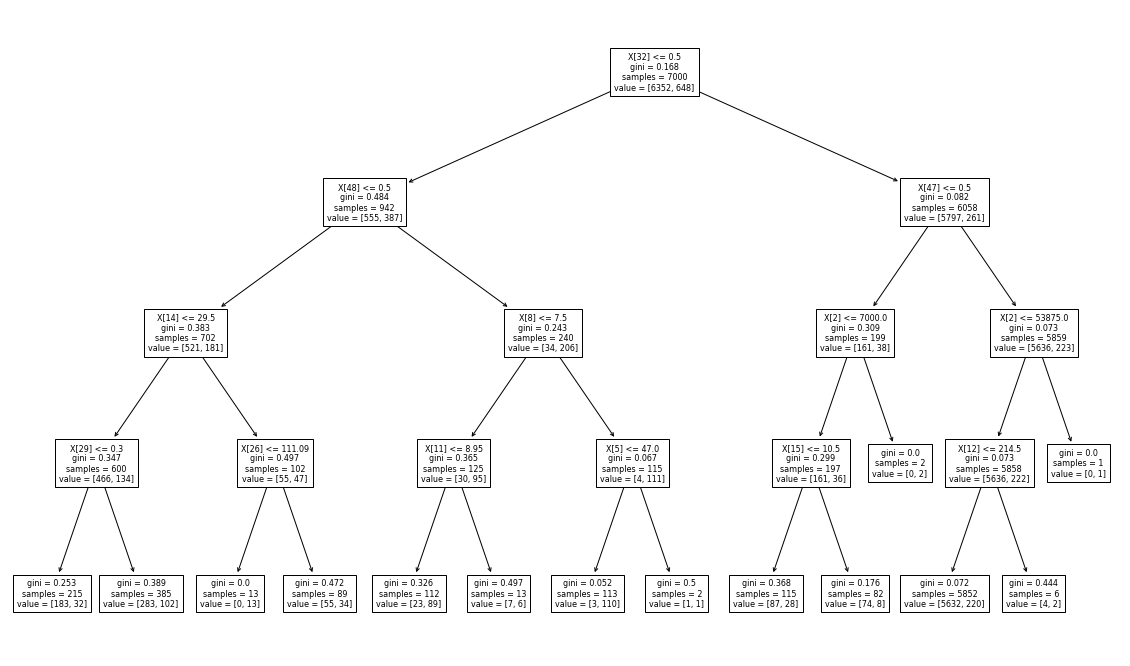

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
y_prob_pred_tree = [x[1] for x in tree.predict_proba(X_test)]

print(confusion_matrix(y_test, y_pred_tree))

plt.figure(figsize=(20,12))
plot_tree(tree, fontsize=8)
plt.show()

### Regressão Logística

In [16]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)
y_prob_pred_logreg = [x[1] for x in logreg.predict_proba(X_test)]

print(confusion_matrix(y_test, y_pred_logreg))

[[2683   25]
 [ 223   69]]


C:\Users\yrbel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### k-vizinhos mais próximos (k-Nearest Neighbors/k-NN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
y_prob_pred_knn = [x[1] for x in knn.predict_proba(X_test)]

print(confusion_matrix(y_test, y_pred_knn))

[[2653   55]
 [ 243   49]]


<a id='eval'></a>
### Avaliação dos Modelos

Já vimos na criação dos modelos uma métrica de avaliação, a matriz de confusão. Porém, essa não é a melhor métrica para avaliação dos modelos de classificação. Entraremos mais a fundo nesse tema mais pra frente, mas trazemos aqui a a curva ROC e a área sob a curva.

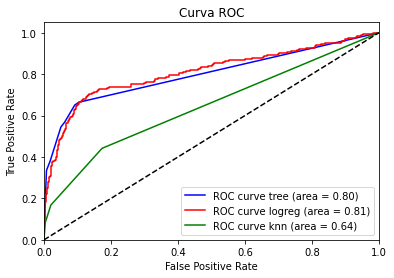

In [18]:
from sklearn.metrics import roc_curve, auc

fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_prob_pred_tree)
auc_tree = auc(fpr_tree, tpr_tree)
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_pred_logreg)
auc_logreg = auc(fpr_logreg, tpr_logreg)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_pred_knn)
auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_tree, tpr_tree, color='blue', label='ROC curve tree (area = %0.2f)' % auc_tree)
plt.plot(fpr_logreg, tpr_logreg, color='red', label='ROC curve logreg (area = %0.2f)' % auc_logreg)
plt.plot(fpr_knn, tpr_knn, color='green', label='ROC curve knn (area = %0.2f)' % auc_knn)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()